In [6]:
import pyranges as pr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import json
# Display all the columns of dataframes
pd.set_option('display.max_columns', None)

# Load the STR-eCLIP overlap data

In [10]:
eclip_STR_within_300_df = pd.read_csv("data/temp/eclip_STR_within_300_df.csv")
eclip_STR_internal_df = pd.read_csv("data/temp/eclip_STR_internal_df.csv")

In [12]:
with open("data/temp/encode_id2rbp.json") as file:
    encode_id2rbp = json.load(file)

# Check for top binders/replicate consistency

Top 10 site binders

In [41]:
internal_num_peaks = eclip_STR_internal_df.iloc[:,14:].sum()
near_ss_num_peaks = eclip_STR_within_300_df.iloc[:,14:].sum()

internal_num_peaks = internal_num_peaks.rename(index = encode_id2rbp)
near_ss_num_peaks = near_ss_num_peaks.rename(index = encode_id2rbp)

In [42]:
print("eCLIP experiments with most peaks at STRs near splice sites:")
for rbp in near_ss_num_peaks.sort_values(ascending=False)[:10].index.values:
    print(rbp)
print("\n\neCLIP experiments with most peaks at intron-internal STRs:")
for rbp in internal_num_peaks.sort_values(ascending=False)[:10].index.values:
    print(rbp)

eCLIP experiments with most peaks at STRs near splice sites:
DDX3X_HepG2
UCHL5_K562
AQR_K562
PRPF8_HepG2
BCLAF1_HepG2
GRWD1_HepG2
PPIG_HepG2
ZNF622_K562
PRPF4_HepG2
AQR_HepG2


eCLIP experiments with most peaks at intron-internal STRs:
PTBP1_HepG2
PTBP1_K562
HNRNPL_HepG2
PCBP2_HepG2
TARDBP_K562
HNRNPL_K562
EIF4G2_K562
AGGF1_K562
CSTF2T_HepG2
AGGF1_HepG2


Comparison of biological replicates for near splice sites

In [87]:
near_ss_HepG2 = pd.DataFrame({"ss_HepG2": near_ss_num_peaks.filter(regex = r'HepG2').rename(lambda x: x.rstrip('_HepG2'))})
near_ss_K562 = pd.DataFrame({"ss_K562": near_ss_num_peaks.filter(regex = r'K562').rename(lambda x: x.rstrip('_K562'))})
internal_HepG2 = pd.DataFrame({"internal_HepG2": internal_num_peaks.filter(regex = r'HepG2').rename(lambda x: x.rstrip('_HepG2'))})
internal_K562 = pd.DataFrame({"internal_K562": internal_num_peaks.filter(regex = r'K562').rename(lambda x: x.rstrip('_K562'))})

In [97]:
peak_count_df = near_ss_HepG2.join([near_ss_K562, internal_HepG2, internal_K562], how = "inner")

[Text(0.5, 0, 'HepG2'),
 Text(0, 0.5, 'K562'),
 Text(0.5, 1.0, 'intron_internal')]

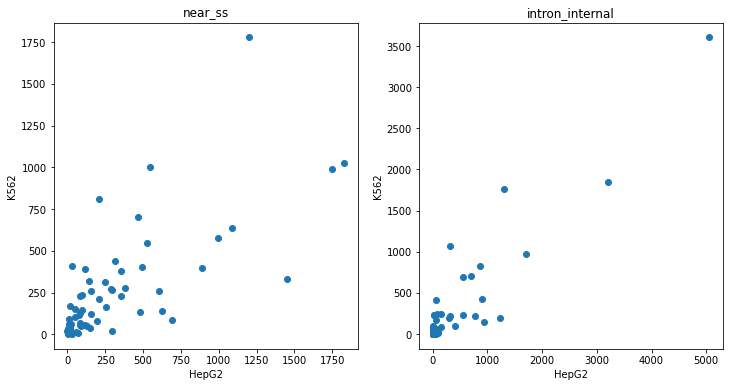

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
ax1.scatter(peak_count_df["ss_HepG2"], peak_count_df["ss_K562"])
ax2.scatter(peak_count_df["internal_HepG2"], peak_count_df["internal_K562"])
ax1.set(xlabel = "HepG2", ylabel = "K562", title = "near_ss")
ax2.set(xlabel = "HepG2", ylabel = "K562", title = "intron_internal")

# Toy RBP enrichment
Compare binding to motifs near splice sites, near STRs vs. motifs near splice sites that aren't STRs

In [104]:
eclip_STR_internal_df

,Chromosome,Start,End,class,Length,Strand,num_units,actual_repeat,gene_id,gene_strand,str_annotation,str_in_promoter,dist_to_tss,dist_to_ss,ENCFF844VZT,ENCFF329VBT,ENCFF553APP,ENCFF204UQL,ENCFF441YAZ,ENCFF004IIT,ENCFF257KKQ,ENCFF667MXK,ENCFF047PZR,ENCFF560CDL,ENCFF119DHE,ENCFF037BNT,ENCFF878JOG,ENCFF598NYT,ENCFF514NWO,ENCFF717EQF,ENCFF693ZAZ,ENCFF846JEW,ENCFF565RQI,ENCFF021VWK,ENCFF358QSY,ENCFF982GEG,ENCFF842EFT,ENCFF901ABJ,ENCFF651CNX,ENCFF877QKG,ENCFF530MIN,ENCFF374GKD,ENCFF238REI,ENCFF534ONM,ENCFF814JGE,ENCFF832JDM,ENCFF400KYS,ENCFF933AGU,ENCFF456CGG,ENCFF055TAZ,ENCFF575BCP,ENCFF305BNZ,ENCFF105PMR,ENCFF448SCQ,ENCFF975HKC,ENCFF837ZOX,ENCFF546EKR,ENCFF159VOF,ENCFF261SMW,ENCFF985DTC,ENCFF298YFY,ENCFF075TIW,ENCFF969AOQ,ENCFF485KCC,ENCFF800GPC,ENCFF865AZP,ENCFF456SOS,ENCFF331AFC,ENCFF509AKB,ENCFF097FBP,ENCFF431WWR,ENCFF153CMF,ENCFF805LKH,ENCFF193UPY,ENCFF239WCW,ENCFF958EFT,ENCFF545FMX,ENCFF410XHF,ENCFF163SWW,ENCFF331VCF,ENCFF822NMS,ENCFF640DDA,ENCFF146YPF,ENCFF788LMZ,ENCFF767LWE,ENCFF427AAU,ENCFF322GPD,ENCFF934PXE,ENCFF851FUY,ENCFF834BGX,ENCFF513PTZ,ENCFF956PEQ,ENCFF803GSP,ENCFF327WXM,ENCFF431FMQ,ENCFF917NGY,ENCFF233ZXV,ENCFF888SME,ENCFF222ULF,ENCFF357ABQ,ENCFF977MKB,ENCFF854NXI,ENCFF105AKX,ENCFF002FLD,ENCFF485NXM,ENCFF242WEP,ENCFF469SRC,ENCFF540UOQ,ENCFF034YUT,ENCFF924CZR,ENCFF241SUC,ENCFF821EXR,ENCFF624RZR,ENCFF955VYD,ENCFF061DTB,ENCFF944ISN,ENCFF154DRN,ENCFF351RHN,ENCFF736YDH,ENCFF481RZR,ENCFF648LCX,ENCFF656IDO,ENCFF027CBV,ENCFF130JJX,ENCFF368MXJ,ENCFF963CVD,ENCFF265RIO,ENCFF793EJK,ENCFF080PGT,ENCFF151HRC,ENCFF885OWJ,ENCFF336WDV,ENCFF449ZHX,ENCFF284MRX,ENCFF302FFF,ENCFF727HMM,ENCFF637JMJ,ENCFF374PBK,ENCFF146YIO,ENCFF727XDH,ENCFF370GDB,ENCFF865SCT,ENCFF538ZHY,ENCFF945YRD,ENCFF092XHF,ENCFF890VLH,ENCFF310NDD,ENCFF993NVI,ENCFF159HMF,ENCFF039FGP,ENCFF263BIJ,ENCFF536BUW,ENCFF456PLF,ENCFF582WWR,ENCFF264WFT,ENCFF923ZLX,ENCFF151ZTH,ENCFF075NSB,ENCFF955PCQ,ENCFF400CFS,ENCFF324PNB,ENCFF889CCS,ENCFF363FKB,ENCFF700XBC,ENCFF242FDW,ENCFF387ZAH,ENCFF890NIT,ENCFF074EQM,ENCFF241KPE,ENCFF792WPY,ENCFF875QBF,ENCFF014MZO,ENCFF103XLC,ENCFF284NOU,ENCFF304YLR,ENCFF938JQE,ENCFF149CJJ,ENCFF075XTM,ENCFF108TOJ,ENCFF017IRY,ENCFF445CGF,ENCFF190WAS,ENCFF470JIH,ENCFF363HHT,ENCFF169SMQ,ENCFF565BTR,ENCFF949RPR,ENCFF342PGS,ENCFF710LWM,ENCFF391KVJ,ENCFF758EWI,ENCFF756RYJ,ENCFF617LAH,ENCFF363IJZ,ENCFF741FRL,ENCFF764MPF,ENCFF451AQL,ENCFF131ZWK,ENCFF296JHG,ENCFF623DVN,ENCFF036IYW,ENCFF187VMX,ENCFF926QBW,ENCFF510KUY,ENCFF440FET,ENCFF355WVE,ENCFF298ZAG,ENCFF124YKO,ENCFF259NLI,ENCFF929AVT,ENCFF937QJB,ENCFF445JRX,ENCFF170SCU,ENCFF930HHV,ENCFF713QGM,ENCFF311TOZ,ENCFF207UUG,ENCFF514KIW,ENCFF788UFQ,ENCFF982RHC,ENCFF527BMM,ENCFF367VYJ,ENCFF693EMF,ENCFF546ZFM,ENCFF567MGK,ENCFF101EKG,ENCFF046VQV,ENCFF800XSC,ENCFF215XPR,ENCFF871BYW,ENCFF890KEE,ENCFF928OEC,ENCFF579NNP,ENCFF517ECT,ENCFF485DDA,ENCFF121XLA,ENCFF777FHS
0,chr1,22811,22823,AAAGG,12,+,2,AGGAA,uc001aac.4,-,Intron,Non-Promoter,6547,1915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chr1,23874,23886,ACCTCC,12,+,2,CCTCCA,uc009viq.3,-,Intron,Non-Promoter,5484,852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chr1,669727,669739,AAC,12,+,4,AAC,uc009vjm.3,-,Intron,Non-Promoter,1255,984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# for a single RBP
# n = # STR peaks near ss with motif
# m = # STRs near ss with motif
# x = # total peaks for that RBP
# y = # total loci near ss where RBP could bind
# 
#                   peak        no peak    total 
#     STR near ss   n             m-n        m
# not STR near ss   x-n           y-x-m+n    y-m
# total             x             y-x        y
